<a href="https://colab.research.google.com/github/Danila506/nn/blob/main/neuralNetwork.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Epoch 1/3
1499/1500 [============================>.] - ETA: 0s - loss: 0.6440 - accuracy: 0.7756
Epoch 1: val_accuracy improved from -inf to 0.85617, saving model to best_model.h5
1500/1500 [==============================] - 72s 47ms/step - loss: 0.6440 - accuracy: 0.7756 - val_loss: 0.3944 - val_accuracy: 0.8562
Epoch 2/3
1499/1500 [============================>.] - ETA: 0s - loss: 0.4283 - accuracy: 0.8505
Epoch 2: val_accuracy did not improve from 0.85617
1500/1500 [==============================] - 71s 47ms/step - loss: 0.4283 - accuracy: 0.8505 - val_loss: 0.4305 - val_accuracy: 0.8440
Epoch 3/3
1500/1500 [==============================] - ETA: 0s - loss: 0.3756 - accuracy: 0.8686
Epoch 3: val_accuracy improved from 0.85617 to 0.88217, saving model to best_model.h5
313/313 [==============================] - 4s 11ms/step - loss: 0.3411 - accuracy: 0.8749
Test accuracy: 0.8748999834060669
1/1 [==============================] - 0s 187ms/step


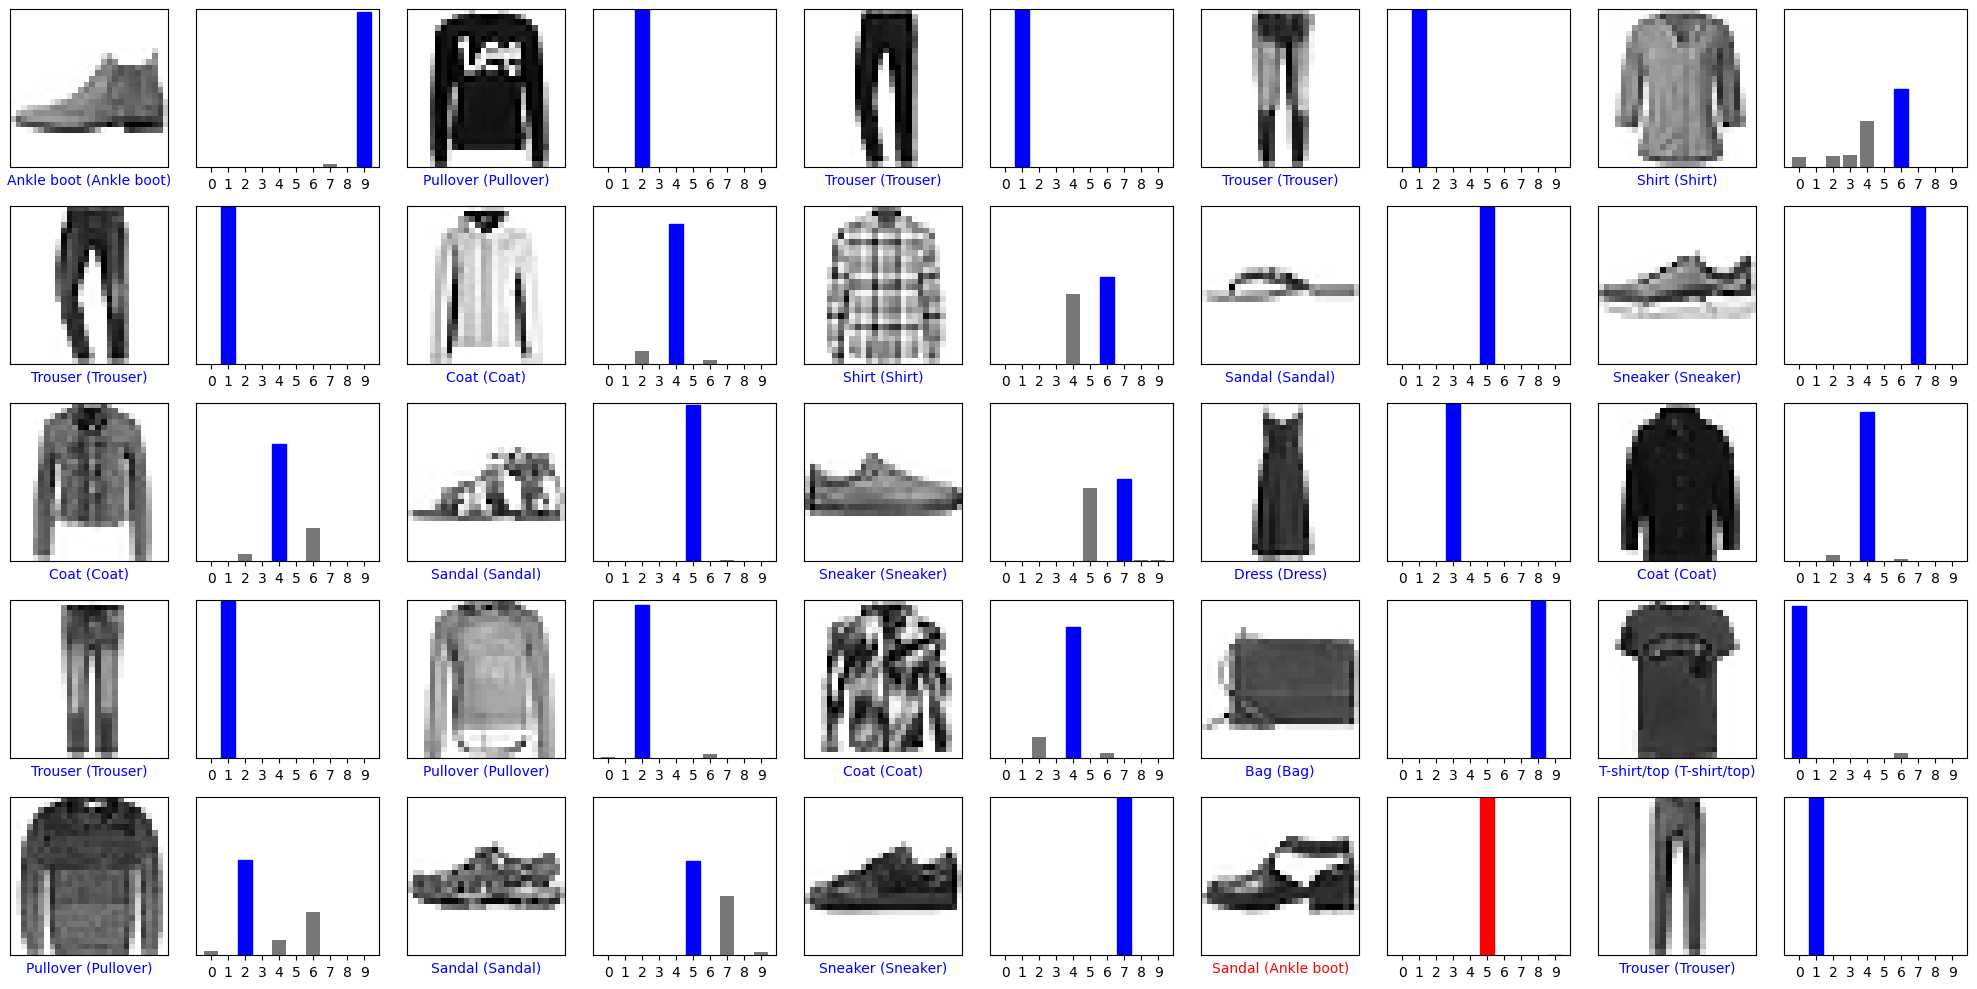

In [7]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping
import numpy as np
import matplotlib.pyplot as plt

# Классы Fashion MNIST
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

# Загрузка датасета Fashion MNIST
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.fashion_mnist.load_data()

# Предобработка данных
x_train = x_train.reshape(-1, 28, 28, 1).astype('float32') / 255.0
x_test = x_test.reshape(-1, 28, 28, 1).astype('float32') / 255.0

# Преобразование меток в one-hot encoding
y_train = tf.keras.utils.to_categorical(y_train, 10)
y_test = tf.keras.utils.to_categorical(y_test, 10)

# Создание модели
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    BatchNormalization(),
    MaxPooling2D((2, 2)),

    Conv2D(64, (3, 3), activation='relu'),
    BatchNormalization(),
    MaxPooling2D((2, 2)),

    Conv2D(128, (3, 3), activation='relu'),
    BatchNormalization(),
    MaxPooling2D((2, 2)),

    Flatten(),
    Dense(256, activation='relu'),
    Dropout(0.5),

    Dense(128, activation='relu'),
    Dropout(0.5),

    Dense(10, activation='softmax')
])

# Компиляция модели
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Callbacks для сохранения наилучшей модели и ранней остановки
checkpoint = ModelCheckpoint('best_model.h5', monitor='val_accuracy', save_best_only=True, mode='max', verbose=1)
early_stopping = EarlyStopping(monitor='val_accuracy', patience=10, mode='max', verbose=1)

# Обучение модели
history = model.fit(
    x_train, y_train,
    batch_size=32,
    epochs=3,
    validation_split=0.2,
    callbacks=[checkpoint, early_stopping]
)

# Оценка модели
test_loss, test_acc = model.evaluate(x_test, y_test)
print(f'Test accuracy: {test_acc}')

# Функция для предсказания и визуализации результатов
def predict_and_visualize(model, images, labels, class_names):
    predictions = model.predict(images)
    num_rows = 5
    num_cols = 5
    num_images = num_rows * num_cols
    plt.figure(figsize=(2*2*num_cols, 2*num_rows))
    for i in range(num_images):
        plt.subplot(num_rows, 2*num_cols, 2*i+1)
        plot_image(i, predictions, labels, images, class_names)
        plt.subplot(num_rows, 2*num_cols, 2*i+2)
        plot_value_array(i, predictions, labels)
    plt.tight_layout()
    plt.show()

def plot_image(i, predictions_array, true_label, img, class_names):
    predictions_array, true_label, img = predictions_array[i], true_label[i], img[i]
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])

    plt.imshow(img, cmap=plt.cm.binary)

    predicted_label = np.argmax(predictions_array)
    if predicted_label == true_label:
        color = 'blue'
    else:
        color = 'red'

    plt.xlabel(f"{class_names[predicted_label]} ({class_names[true_label]})", color=color)

def plot_value_array(i, predictions_array, true_label):
    predictions_array, true_label = predictions_array[i], true_label[i]
    plt.grid(False)
    plt.xticks(range(10))
    plt.yticks([])
    thisplot = plt.bar(range(10), predictions_array, color="#777777")
    plt.ylim([0, 1])
    predicted_label = np.argmax(predictions_array)

    thisplot[predicted_label].set_color('red')
    thisplot[true_label].set_color('blue')

# Визуализация предсказаний для первых 25 тестовых изображений
predict_and_visualize(model, x_test[:25], y_test.argmax(axis=1)[:25], class_names)